In [1]:
from ncut_feature import *
from ncut_pytorch import rgb_from_tsne_3d

In [2]:
# target_folder = "test_long_text_small_image"
# target_folder = "test_long_text_mid_image"
# target_folder = "test_short_text_small_image"
# target_folder = "test_short_text_mid_image"
# target_folder = "test_mid_text_small_image"
target_folder = "test_mid_text_mid_image"
feature_path = f"{target_folder}/feature_maps"
x_feature_maps, c_feature_maps = get_feature_maps(feature_path)

In [3]:
batch_no = 0
steps = list(x_feature_maps.keys())
tokens = list(c_feature_maps[steps[0]][batch_no].keys())

num_eig = 100
num_steps = len(steps)
num_tokens = len(tokens)
x_size = x_feature_maps[steps[0]][batch_no].shape[0] # 400
x_height = int(np.sqrt(x_size)) # 20
x_width = x_size // x_height # 20
x_dim = x_feature_maps[steps[0]][batch_no].shape[1] # 1536
c_dim = c_feature_maps[steps[0]][batch_no][tokens[0]].shape[0] # 1536

print(f"Image Feature Map Size: ({x_height}x{x_width})x{x_dim} = {x_size}x{x_dim}")
print(f"Text Feature Map Size: {num_tokens}x{c_dim}")

c_features = group_c_features(c_feature_maps, batch_no) # [num_steps * num_tokens, c_dim]
c_eign_vec, c_eign_val = ncut_features(c_features, num_eig)

Image Feature Map Size: (20x20)x1536 = 400x1536
Text Feature Map Size: 20x1536


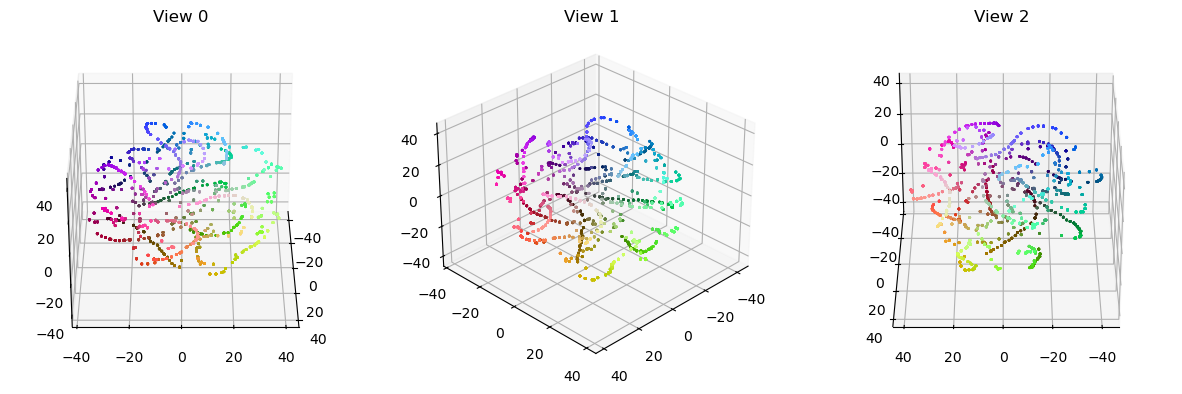

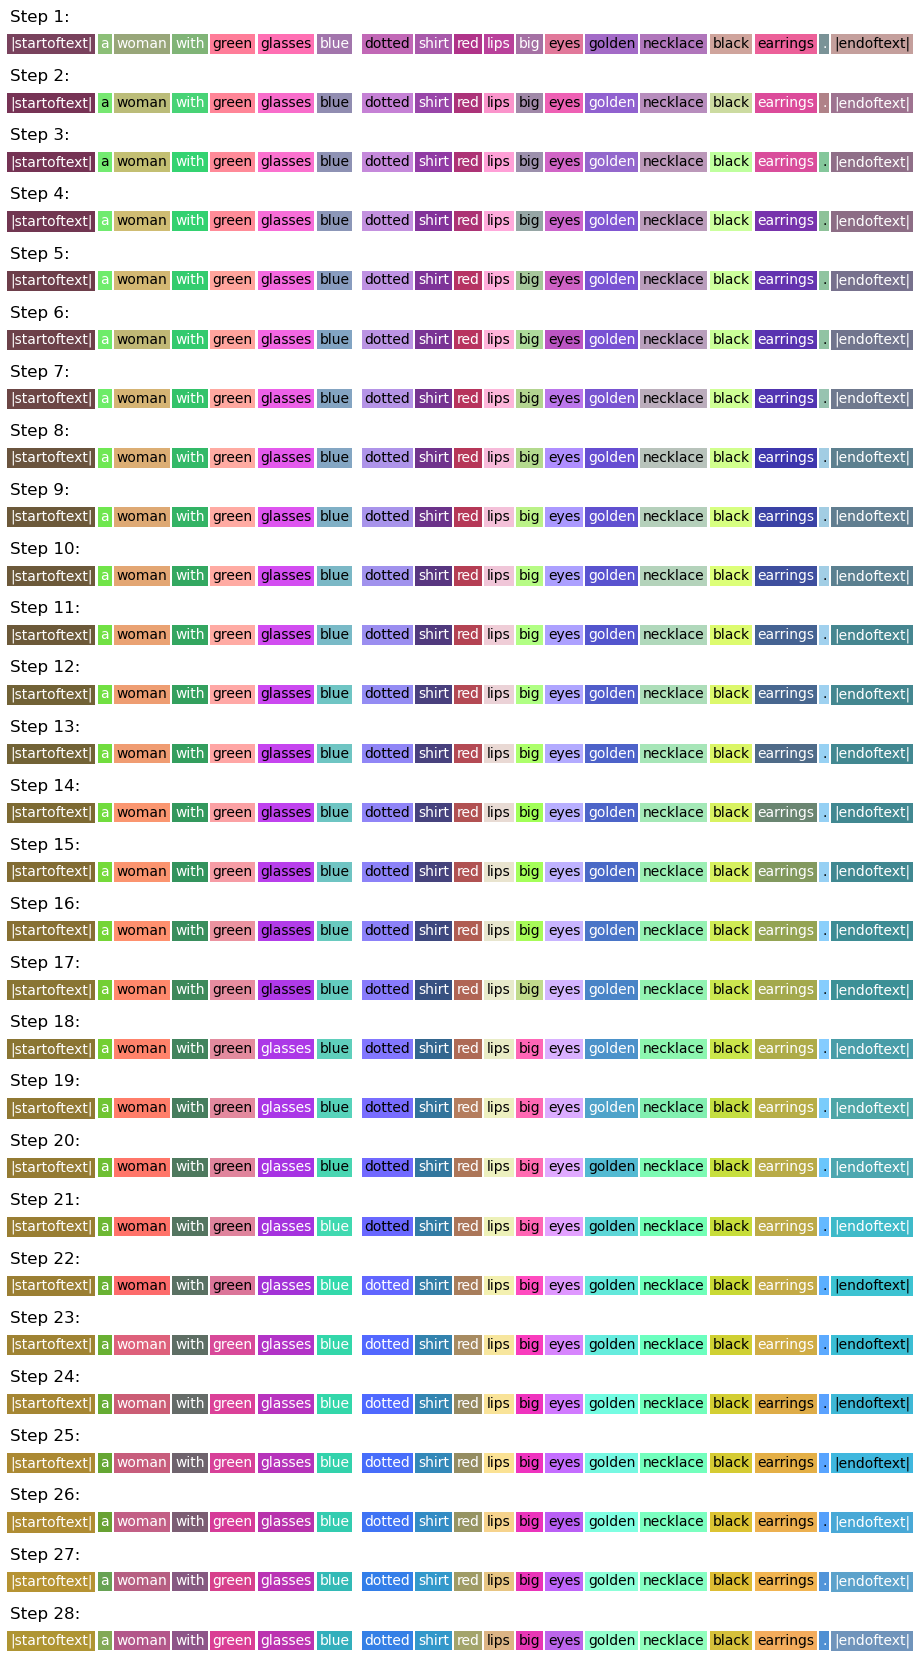

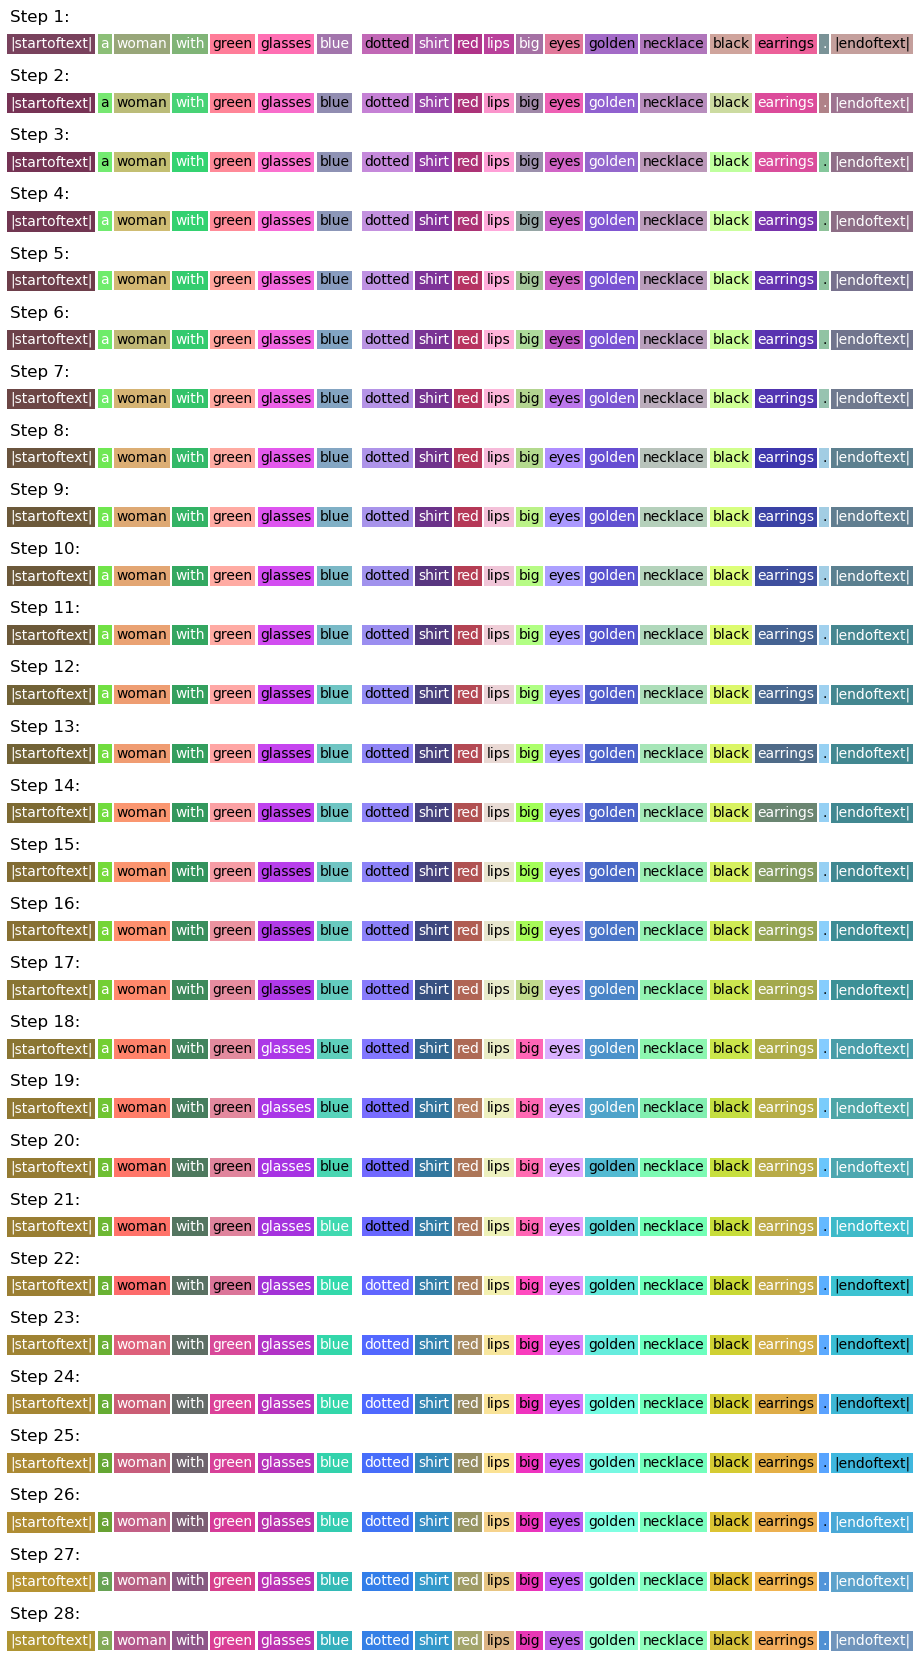

In [5]:
select_eign = 100
c_3d, c_rgb = rgb_from_tsne_3d(c_eign_vec[:, :select_eign])
# title = f"{select_eign} Eigenvectors of NCUT SD3 Text Features"
title = ""
plot_3d(c_3d, c_rgb, title, num_nodes=num_steps * num_tokens)
c_features_rgb = c_rgb.reshape(num_steps, num_tokens, 3).numpy()
plot_texts(c_features_rgb, tokens, title)